In [5]:

import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor



In [6]:
data = pd.read_csv('C:/Users/pbsns/OneDrive/Desktop/Shale_Gas_Wells.csv')

In [7]:
data_info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Stage Spacing      506 non-null    int64  
 1   bbl/ft             506 non-null    int64  
 2   Well Spacing       506 non-null    int64  
 3   Dip                506 non-null    int64  
 4   Thickness          506 non-null    int64  
 5   Lateral Length     506 non-null    int64  
 6   Injection Rate     506 non-null    int64  
 7   Porosity           506 non-null    float64
 8   ISIP               506 non-null    int64  
 9   Water Saturation   506 non-null    float64
 10  Percentage of LG   506 non-null    float64
 11  Pressure Gradient  506 non-null    float64
 12  Proppant Loading   506 non-null    int64  
 13  EUR                506 non-null    float64
dtypes: float64(5), int64(9)
memory usage: 55.5 KB


In [8]:
data_head = data.head()

In [9]:
data_head

,Stage Spacing,bbl/ft,Well Spacing,Dip,Thickness,Lateral Length,Injection Rate,Porosity,ISIP,Water Saturation,Percentage of LG,Pressure Gradient,Proppant Loading,EUR
0,140,38,850,0,165,8543,64,8.3,8200,17.1,38.0,0.95,3012,13.3
1,140,30,900,0,174,8336,60,7.8,8061,16.0,59.3,0.95,2771,12.5
2,140,30,900,0,174,9361,65,7.8,8061,16.0,59.3,0.95,3067,16.9
3,140,30,950,0,175,9110,69,8.3,7922,15.7,66.9,0.95,3130,16.5
4,140,30,950,0,175,9310,67,8.3,7922,15.7,66.9,0.95,2991,17.4


In [10]:
summary_statistics = data.describe()

In [11]:
summary_statistics

,Stage Spacing,bbl/ft,Well Spacing,Dip,Thickness,Lateral Length,Injection Rate,Porosity,ISIP,Water Saturation,Percentage of LG,Pressure Gradient,Proppant Loading,EUR
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,147.640316,35.134387,820.158103,0.069170,162.365613,8153.086957,63.079051,7.337549,7010.490119,19.213439,64.845455,0.930257,2567.065217,12.845455
std,18.392128,10.533197,135.736986,0.253994,15.471044,942.393981,7.250106,0.749451,1211.452205,3.198579,18.427813,0.046507,413.792220,3.067064
min,140.000000,30.000000,650.000000,0.000000,120.000000,4500.000000,55.000000,5.500000,5000.000000,15.000000,15.000000,0.750000,1100.000000,7.000000
25%,140.000000,30.000000,700.000000,0.000000,153.000000,7617.750000,57.000000,6.600000,5000.000000,16.800000,55.900000,0.940000,2317.500000,11.000000
50%,141.000000,30.000000,800.000000,0.000000,165.000000,8051.000000,61.000000,7.500000,7643.000000,17.700000,69.900000,0.950000,2642.000000,12.400000
75%,148.000000,36.000000,900.000000,0.000000,176.000000,8608.000000,69.000000,8.000000,7783.000000,24.100000,79.700000,0.950000,2897.750000,13.700000
max,330.000000,75.000000,1350.000000,1.000000,185.000000,11500.000000,80.000000,8.500000,8200.000000,25.000000,95.000000,0.950000,3200.000000,22.000000


In [12]:
missing_values = data.isnull().sum()

In [13]:
missing_values

Stage Spacing        0
bbl/ft               0
Well Spacing         0
Dip                  0
Thickness            0
Lateral Length       0
Injection Rate       0
Porosity             0
ISIP                 0
Water Saturation     0
Percentage of LG     0
Pressure Gradient    0
Proppant Loading     0
EUR                  0
dtype: int64

C:\Users\pbsns\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pbsns\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pbsns\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pbsns\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

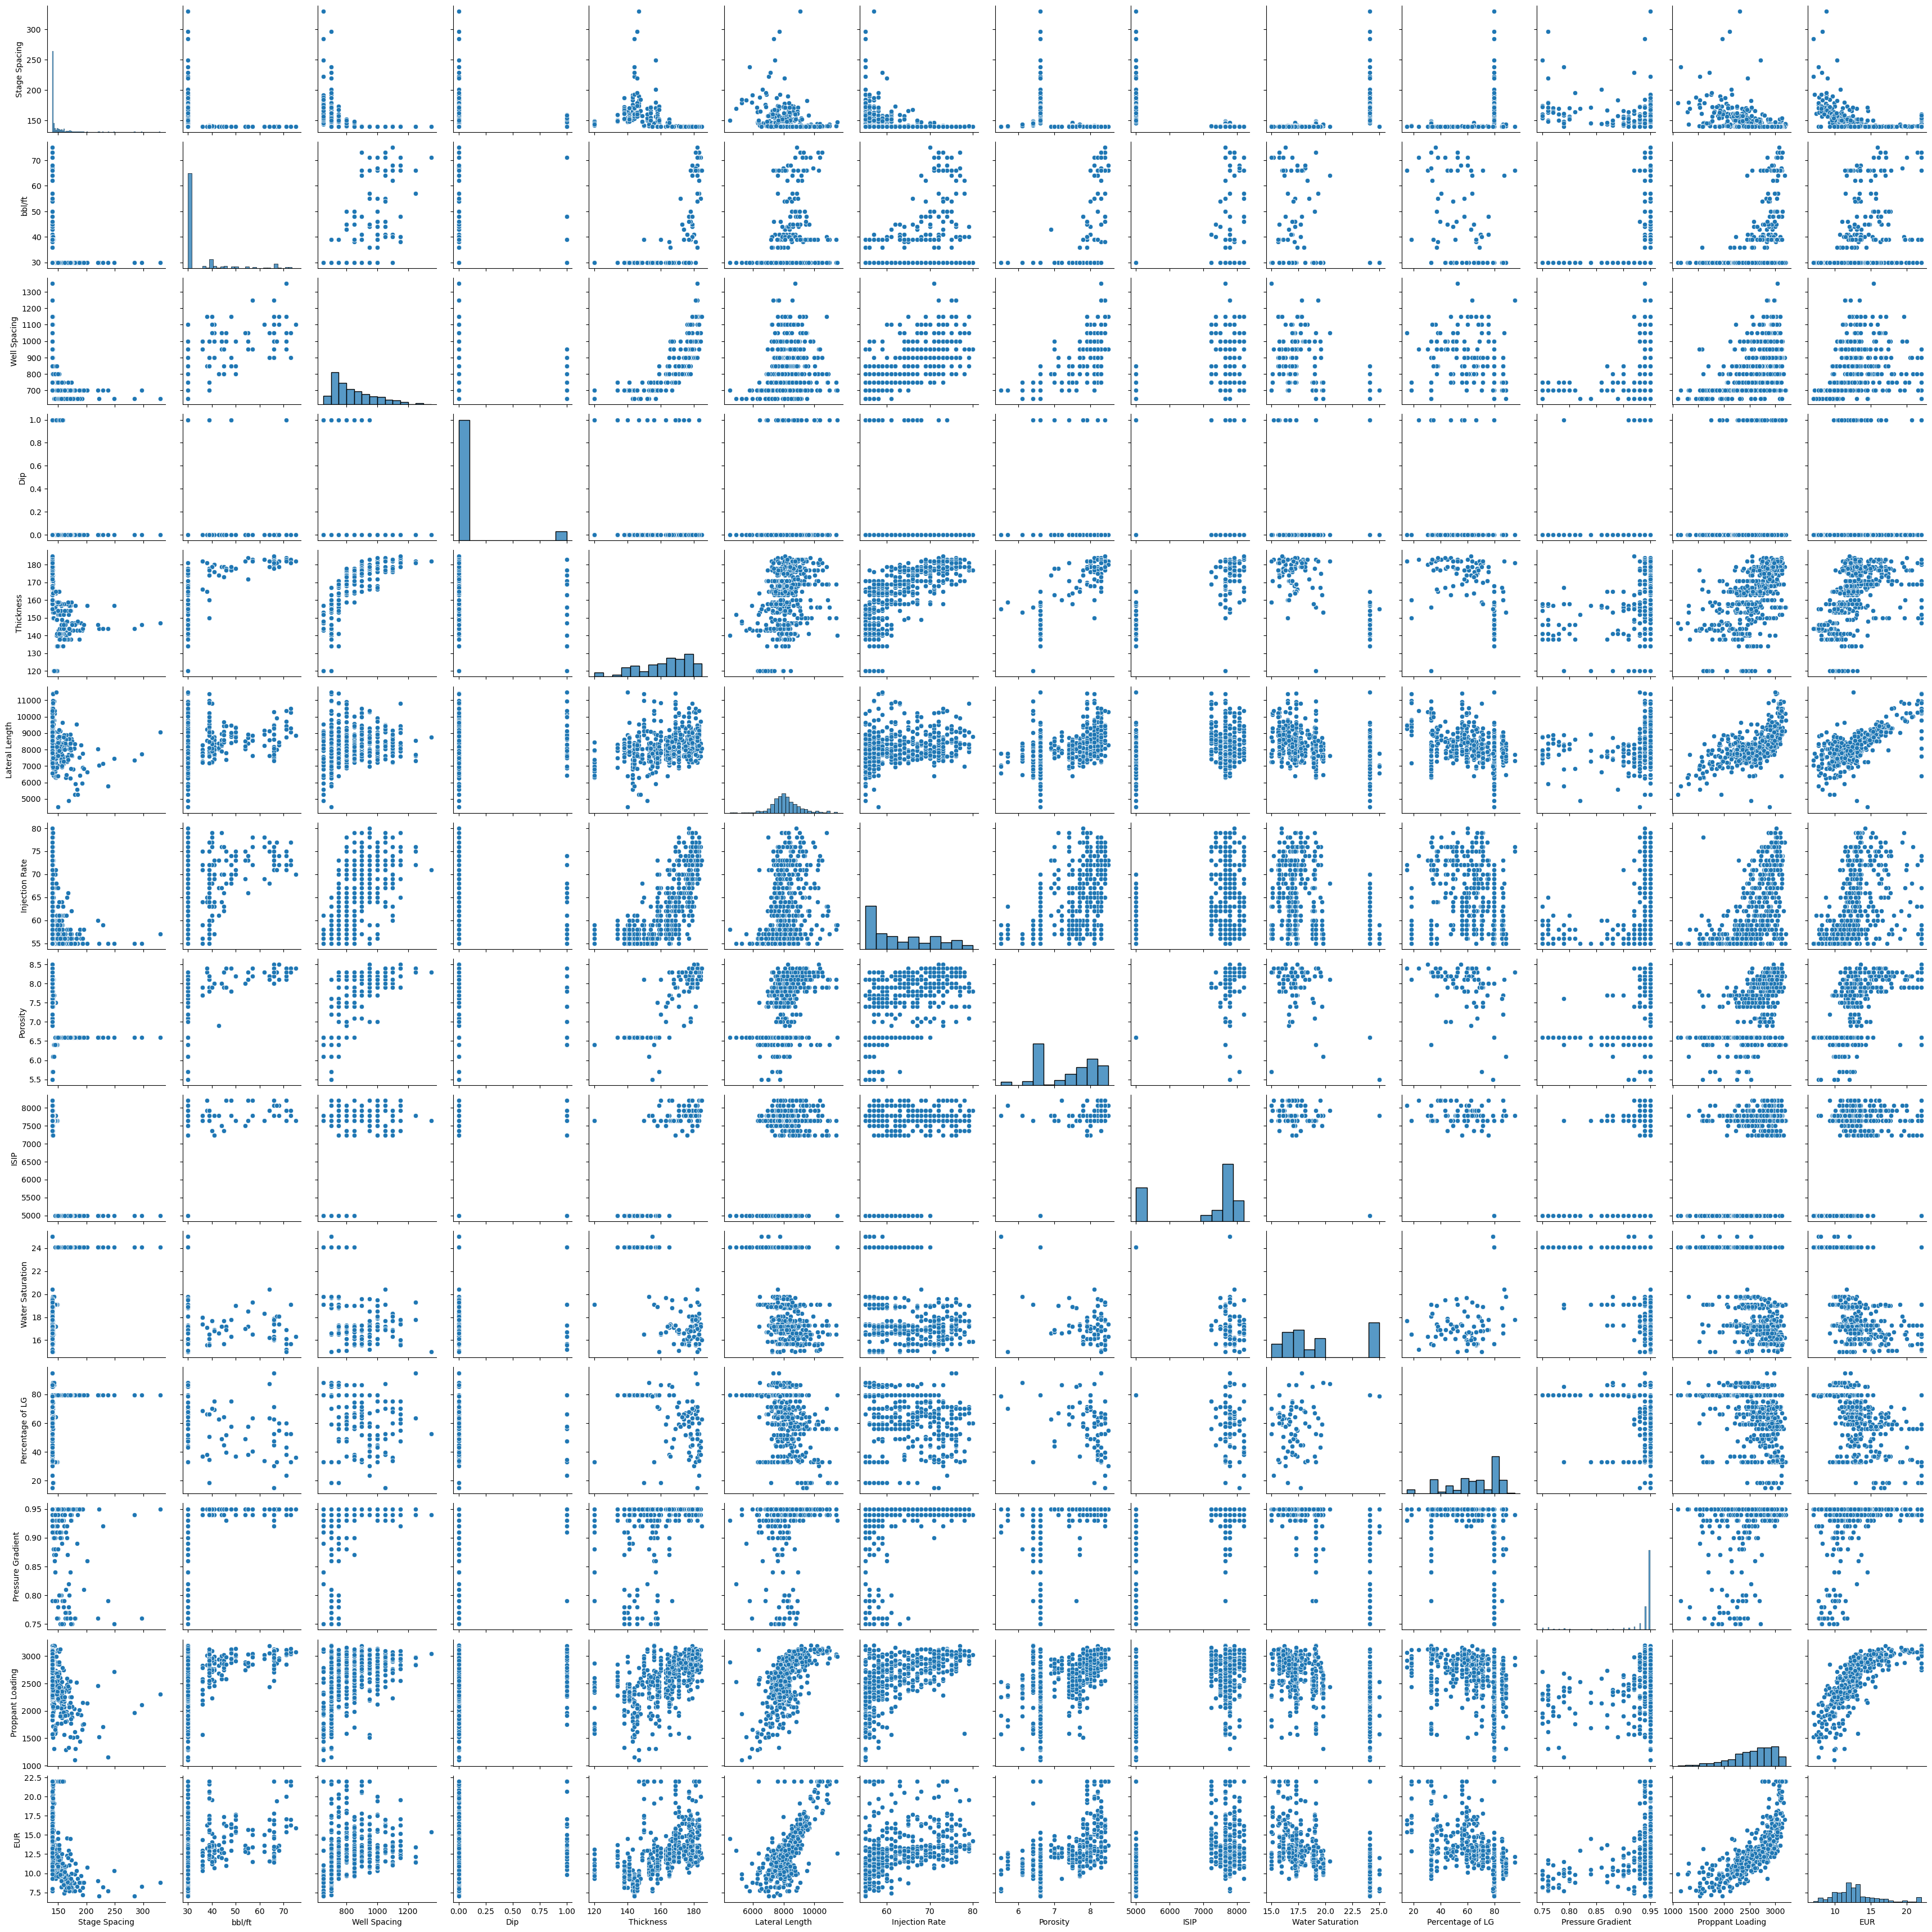

In [14]:



pairplot = sns.pairplot(data.dropna())
pairplot.savefig("pairplot.png")

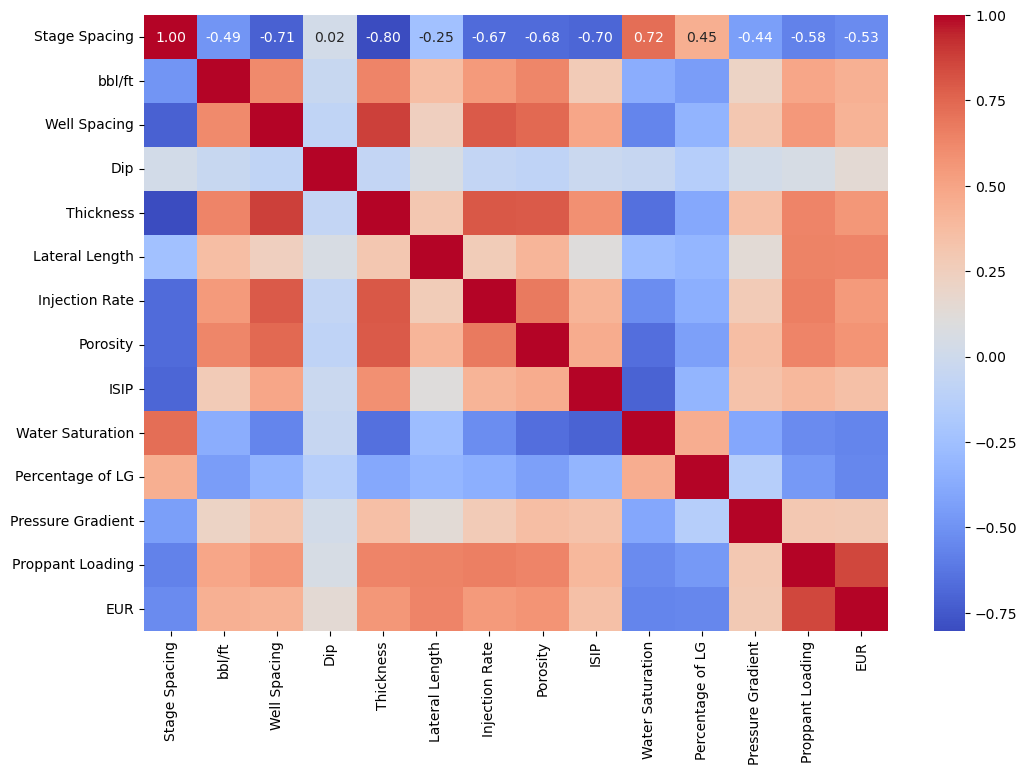

In [15]:
correlation_matrix = data.corr(method='spearman')
plt.figure(figsize=(12, 8))
correlation_heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
correlation_heatmap.figure.savefig("correlation_heatmap.png")

In [16]:
X = data.drop(columns=['EUR'])
y = data['EUR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [1]:
!pip install ydata-profiling

     ---------------------------------------- 0.0/85.1 kB ? eta -:--:--
     ------------- ------------------------ 30.7/85.1 kB 435.7 kB/s eta 0:00:01
     ------------------------------------ - 81.9/85.1 kB 762.6 kB/s eta 0:00:01
     -------------------------------------- 85.1/85.1 kB 686.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/357.9 kB ? eta -:--:--
   ---------------------- ----------------- 204.8/357.9 kB 4.1 MB/s eta 0:00:01
   ------------------------------------- -- 337.9/357.9 kB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 357.9/357.9 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/394.9 kB ? eta -:--:--
   -------- ------------------------------- 81.9/394.9 kB 4.5 MB/s eta 0:00:01
   -------------------------------- ------- 317.4/394.9 kB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 394.9/394.9 kB 3.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:-

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-cloud-auth 0.1.4 requires pydantic<2.0, but you have pydantic 2.6.4 which is incompatible.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.


In [17]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [18]:
y_pred = rf_model.predict(X_test)
y_pred

array([12.861, 15.712, 10.774, 13.189, 10.843, 12.537, 11.669, 10.735,
       12.336, 12.473, 11.874, 11.809,  8.335, 12.59 , 11.591, 13.937,
       11.727,  8.322, 20.829,  9.942, 13.49 , 13.31 , 10.325, 13.015,
       10.508, 10.483, 12.381,  9.975, 11.908, 12.403, 11.577, 13.12 ,
       14.51 , 12.078, 10.242, 10.463, 17.125, 11.795, 12.269, 13.458,
       11.573, 15.169, 20.871, 11.533, 12.793, 10.129, 10.383, 13.533,
       11.232, 14.928, 12.472, 17.051, 10.709, 14.08 , 20.126, 12.665,
       10.539, 16.16 , 12.836, 12.199, 14.112, 16.908, 15.095, 11.444,
       14.27 , 11.099,  9.991, 13.081, 14.747, 10.583, 12.073, 15.191,
        8.795, 12.632, 12.71 ,  7.642, 12.025, 21.169,  9.38 ,  9.392,
       12.431,  9.73 , 11.916,  8.351, 12.253, 14.694, 10.403, 13.124,
       13.187, 11.332, 12.676,  8.045, 11.606, 11.708, 13.152, 11.914,
       16.312,  9.659,  9.799,  9.841, 12.26 , 13.309])

In [19]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2


0.8677581481942844

In [20]:
feature_importance = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]


In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
nn_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000, random_state=42)
nn_model.fit(X_train_scaled, y_train)


MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

In [23]:
y_pred_nn = nn_model.predict(X_test_scaled)
y_pred_nn

array([14.6140382 , 16.57975654, 11.95669407, 15.61599963, 10.96146305,
       11.54308781,  9.88892417,  9.55717557, 13.49057247, 10.55950876,
       13.2606752 , 10.79302084,  7.50988873, 11.1778027 , 11.71981182,
       12.83417629, 12.51683859,  8.96540662, 20.85513164, 10.62869141,
       15.01136328, 14.13026261,  9.7622044 , 12.96933076, 11.29412093,
       11.64364139, 13.08151566,  9.54312319, 13.35778808, 10.61421709,
       13.30448565, 13.30730894, 11.52584567, 14.40249979, 11.1791781 ,
       11.27605791, 16.47628805, 12.91807474, 12.76910081, 14.96642593,
       10.48828014, 14.34688585, 21.82842019, 12.63328154, 14.74142066,
       11.79017693, 10.47907355, 15.44505499, 12.86164384, 14.76342365,
       11.47844242, 17.6918928 , 10.24967781, 13.80007811, 19.93790677,
       12.68177854, 11.78145872, 16.69895808, 13.94431265, 11.05652451,
       12.94348826, 17.83000934, 15.50690816, 11.52408168, 13.5858158 ,
       13.28256814, 11.0216953 , 14.01318552, 16.09343897, 10.42

In [24]:
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)
mse_nn
r2_nn

0.7586061081375883

In [25]:
from ydata_profiling import ProfileReport

In [26]:
pro= ProfileReport(data)

In [28]:
pro.to_file("ws.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]